In [1114]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [1115]:
df1 = pd.read_csv('concat_first.csv')
df2 = pd.read_csv('concat_second.csv')
df3 = pd.read_csv('concat_third.csv')

In [1116]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(9975, 10)
(9978, 11)
(9314, 2)


In [1117]:
df_merge = pd.merge(left=df1, right=df2, how='inner',on='prop_id')

In [1118]:
df_merge.shape

(9975, 20)

In [1119]:
propid_list = df_merge['prop_id'].tolist()
df_merge['prop_id'] = [x[13:] for x in propid_list]
df_merge['prop_id'] = df_merge['prop_id'].astype(int)

In [1120]:
df_merge = pd.merge(left=df_merge, right=df3, how='left',on='prop_id')

In [1121]:
df_merge.shape

(9975, 21)

In [1122]:
search = []    
for value in df_merge['other']:
    search.append(re.findall(r"tenants preferred \w\w\w\w\w\w\w\w\w/\w\w\w\w\w\w", value))
df_merge['marital_status_pref'] = search   

df_merge['marital_status_pref'] = df_merge['marital_status_pref'].apply(''.join)
df_merge['marital_status_pref']  = df_merge['marital_status_pref'].replace(r'^\s*$', np.nan, regex=True)
df_merge['marital_status_pref'] = df_merge['marital_status_pref'].str.replace(r'tenants preferred ','')

In [1123]:
df_merge['date_posted'] = df_merge['date_posted'].astype(int)
df_merge['date_posted'] = df_merge['date_posted'].astype(str)

def split(x):
    a = x[:4]
    b = x[4:6]
    c = x[6:]
    d = a+'-'+b+'-'+c
    return d

df_merge['date_posted'] = [split(x) for x in df_merge['date_posted']]
df_merge['date_posted'] = pd.to_datetime(df_merge['date_posted'], format='%Y-%m-%d')

In [1124]:
df_merge['availability'] = df_merge['other'].str.contains('Immediately').map({True:'Immediate',False:np.nan})

In [1125]:
filt = (df_merge['marital_status_pref'] != 'Bachelors/Family')
df1 = df_merge.loc[filt]

In [1126]:
df1.shape

(3279, 23)

In [1127]:
df1['marital_status_pref'] = np.where(df1['other'].str.contains('Bachelors',na=False),'Bachelors','Family')

/Applications/AnacondaPython/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [1128]:
filt = (df_merge['marital_status_pref'] == 'Bachelors/Family')
df2 = df_merge.loc[filt]

In [1129]:
df2.shape

(6696, 23)

In [1130]:
frames = [df2,df1]
df = pd.concat(frames)

In [1131]:
df.shape

(9975, 23)

In [1132]:
df['bedrooms'] = df['bedrooms'].str.replace('>','')
df['bedrooms'] = df['bedrooms'].replace(r'^\s*','',regex=True)
df['bedrooms'] = df['bedrooms'].astype(float)

In [1133]:
df['bathrooms'] = df['bathrooms'].str.replace('>','')
df['bathrooms'] = df['bathrooms'].replace(r'^\s*','',regex=True)
df['bathrooms'] = df['bathrooms'].astype(float)

In [1134]:
df.drop(columns=['builder','price','prop_id','bedrooms2','property_type2','user_type2'], inplace=True)
df.rename(columns = {'builder2':'builder', 'price2':'price'},inplace=True)

In [1135]:
df['isprice_benford'] = df['price'].astype(str).str.contains(r'^1',regex=True)
df['isarea_benford'] = df['area_sqft'].astype(str).str.contains(r'^1',regex=True)

In [1136]:
loc_grp = df.groupby('locality')
df['loc_count'] = loc_grp['locality'].transform('count')

In [1137]:
df.head(150)

,bedrooms,locality,property_type,ispaiduser,user_type,other,description,bathrooms,date_posted,builder,project,floor,furnish_status,price,area_sqft,marital_status_pref,availability,isprice_benford,isarea_benford,loc_count
1,3.0,"Patrika Nagar, Hitech City",Builder Floor Apartment,Y,Agent,floor 1 out of 5 Floors furnishing Furnished...,3BHK Property Available For Rent,3.0,2021-09-18,NaN,NaN,1,Furnished,22000.0,2000.0,Bachelors/Family,Immediate,False,False,8.0
4,3.0,"Tellapur, Outer Ring Road",Villa,Y,Agent,furnishing Semi-Furnished tenants preferred ...,it is a gated community villa project providin...,3.0,2021-09-19,NaN,NaN,NaN,Semi-Furnished,40000.0,NaN,Bachelors/Family,Immediate,False,False,42.0
6,4.0,"Kokapet, Outer Ring Road",Villa,Y,Agent,furnishing Furnished tenants preferred Bache...,Prime location.Celebritis living place.Excelle...,5.0,2021-09-17,NaN,NaN,NaN,Furnished,160000.0,4300.0,Bachelors/Family,Immediate,True,False,98.0
7,3.0,NaN,Apartment,Y,Agent,floor 1 out of 26 Floors furnishing Semi-Fur...,"3 BHK, Multistorey Apartment is available for ...",3.0,2021-09-18,NaN,NaN,1,Semi-Furnished,31000.0,1835.0,Bachelors/Family,Immediate,False,True,NaN
8,3.0,Gachibowli,Apartment,Y,Agent,floor 1 out of 10 Floors furnishing Unfurnis...,In the Centre of Prime location. Proximity to ...,5.0,2021-09-18,Trendset Builders,Trendset Winz,1,Unfurnished,55000.0,2800.0,Bachelors/Family,Immediate,False,False,465.0
12,3.0,Gachibowli,Apartment,Y,Owner,floor Ground out of 21 Floors furnishing Sem...,Flat located between it companies.,2.0,2021-09-18,Mantri Developers Pvt. Ltd.,Mantri Celestia,Ground,Semi-Furnished,28000.0,1198.0,Bachelors/Family,Immediate,False,True,465.0
15,3.0,NaN,Apartment,Y,Owner,floor Ground out of 3 Floors furnishing Furn...,Peacefully appartnent and locality.,3.0,2021-09-18,NaN,NaN,Ground,Furnished,32000.0,1400.0,Bachelors/Family,Immediate,False,True,NaN
16,2.0,Madhapur,Apartment,Y,Owner,floor 1 out of 5 Floors furnishing Semi-Furn...,"Well ventilated, very spacious large house in ...",2.0,2021-09-18,NaN,Aditi enclave,1,Semi-Furnished,23000.0,1550.0,Bachelors/Family,Immediate,False,True,156.0
17,3.0,"Narsingi, Outer Ring Road",Builder Floor Apartment,Y,Owner,floor 2 out of 6 Floors furnishing Furnished...,spacious west facing 3 bhk in one of the best ...,3.0,2021-09-18,My Home Group,My Home Avatar,2,Furnished,35000.0,1840.0,Bachelors/Family,Immediate,False,True,134.0
19,2.0,NaN,Apartment,Y,Owner,floor 5 out of 5 Floors furnishing Furnished...,"2 BHK, Multistorey Apartment is available for ...",2.0,2021-09-18,NaN,NaN,5,Furnished,14000.0,787.0,Bachelors/Family,Immediate,True,False,NaN


In [1138]:
df.reset_index(inplace = True, drop = True)

In [1139]:
df.to_csv('merged_rental_hyderabad.csv', index=False)

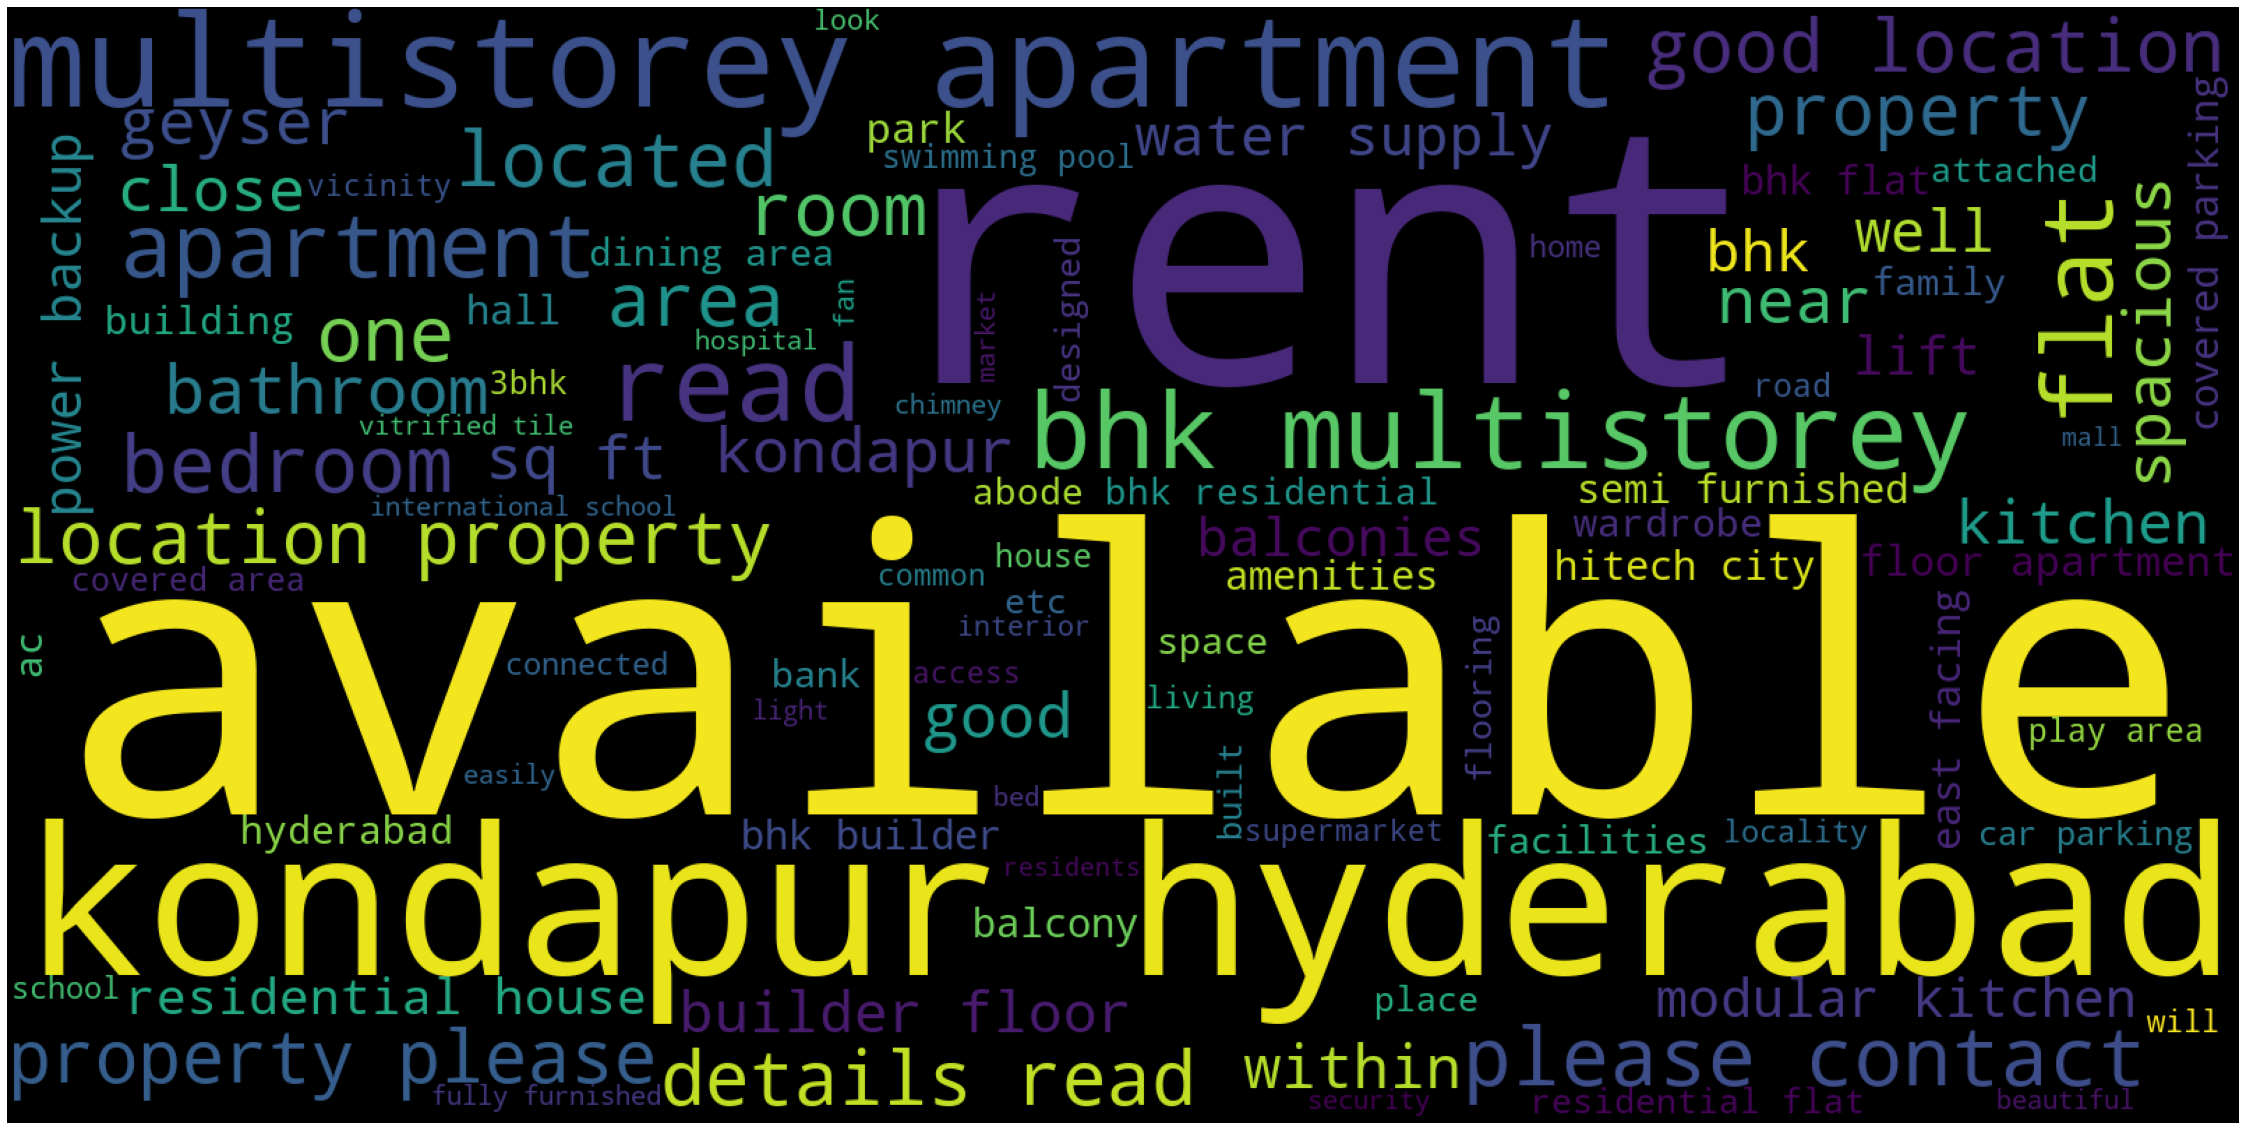

In [1140]:
df_merge['description'] = df_merge['description'].astype(str)

filt = (df_merge['locality']=='Kondapur')
df3 = df_merge.loc[filt]

description = ' '.join(df3['description'])
description = description.lower()
description = description.strip()
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 1600, height = 800,stopwords=stopwords,max_words=100).generate(description)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 